## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study_data = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="inner")


# Display the data table for preview
combined_mouse_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_count = len(combined_mouse_study_data["Mouse ID"].unique())
mouse_count



249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mouse_study_data.drop_duplicates(subset= ['Mouse ID','Timepoint'] , keep= "first")
duplicate_mice



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
single_duplicate_mouseid = combined_mouse_study_data.loc[combined_mouse_study_data.duplicated(keep='first')]
single_duplicate_mouseid

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse = combined_mouse_study_data.drop_duplicates(subset= ['Mouse ID','Timepoint'], keep= "first")
clean_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

clean_df_count = clean_mouse["Mouse ID"].count()

clean_df_count

1888

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mouse_tumor_mean = clean_mouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
mouse_tumor_median = clean_mouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
mouse_tumor_variance = clean_mouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
mouse_tumor_std = clean_mouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
mouse_tumor_sem = clean_mouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


mouse_tumor_summary_df = pd.DataFrame({"Average":mouse_tumor_mean,
                                       "Median":mouse_tumor_median,
                                       "Variance":mouse_tumor_variance,
                                       "Standard Deviation":mouse_tumor_std,
                                       "SEM":mouse_tumor_sem})
                                       
                                       
                                       
mouse_tumor_summary_df




,Average,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

clean_mouse.groupby(['Drug Regimen']).agg(mean_tumor=('Tumor Volume (mm3)',np.mean),
                                          median_tumor=('Tumor Volume (mm3)',np.median),
                                          variance_tumor=('Tumor Volume (mm3)',np.var),
                                          stdv_tumor=('Tumor Volume (mm3)',np.std),
                                          sem_tumor = ('Tumor Volume (mm3)',st.sem))



,mean_tumor,median_tumor,variance_tumor,stdv_tumor,sem_tumor
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

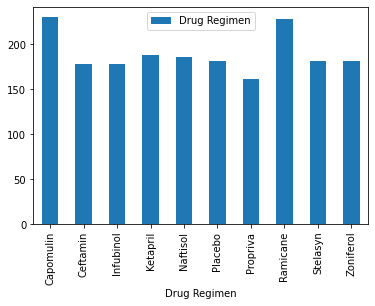

In [33]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 


mice_group = combined_mouse_study_data.groupby("Drug Regimen")
count_of_mice_group = pd.DataFrame(mice_group["Drug Regimen"].count())
mice_per_drug_plot = count_of_mice_group.plot(kind='bar')



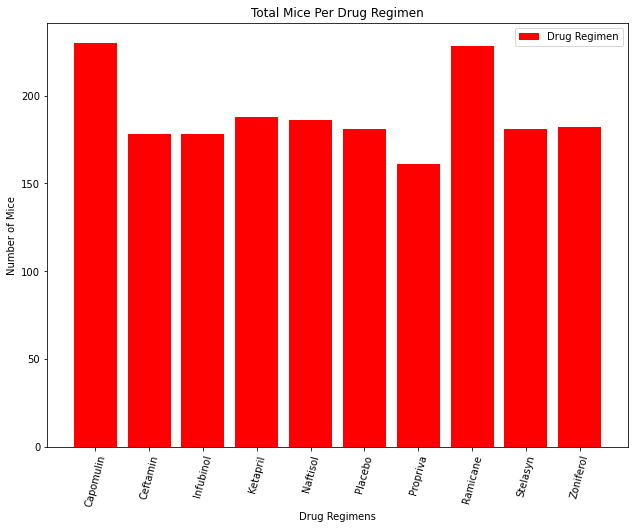

In [35]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


x_drug_regimen = np.arange(len(count_of_mice_group))
tick_locations = []
for x in x_drug_regimen:
    tick_locations.append(x)
plt.figure(figsize =([10.4, 7.8]))
plt.bar(x_drug_regimen,count_of_mice_group["Drug Regimen"],color="red",width = 0.80)
legend_label = ["Drug Regimen"]
plt.legend(legend_label,loc='upper right')
plt.title("Total Mice Per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice")
plt.xticks(tick_locations,list(count_of_mice_group.index), rotation='75')
plt.show()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6BD7FCA58>],
      dtype=object)

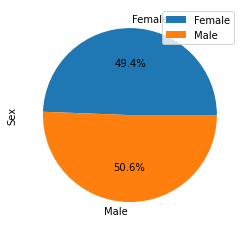

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_sex_group = combined_mouse_study_data.groupby("Sex")
count_of_mice_sex_group = pd.DataFrame(mice_sex_group["Sex"].count())
count_of_mice_sex_group.plot(kind='pie', subplots= True, autopct="%1.1f%%")





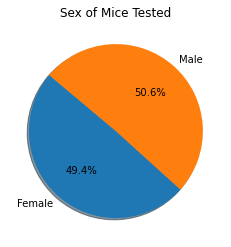

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_sex_labels = count_of_mice_sex_group["Sex"].index
mice_genders = count_of_mice_sex_group["Sex"]

plt.pie(mice_genders,
        labels = mice_sex_labels,
        autopct="%1.1f%%",
        shadow=True, 
        startangle=140)
plt.title("Sex of Mice Tested")
plt.show()


## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse





# Create Drug List
drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol_list = []


for drug in drugs_list:
    tumor_vol = clean_mouse.loc[clean_mouse["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    tumor_vol_list.append([drug])
 

tumor_vol_list


# #charting_dataframe = capomulin.loc[capomulin['Mouse ID']=="b128",:]









# drugs_grouping = clean_mouse.loc[clean_mouse['Drug Regimen'].isin(drugs_being_tested)]
# drugs_grouping


# last_greatest_timepoint_group = drugs_grouping.groupby("Mouse ID").max()['Timepoint']

# last_greatest_timepoint_group




# last_greatest_timepoint_group = clean_mouse[clean_mouse["Drug Regimen"].isin(drugs_being_tested)]
# last_greatest_timepoint_group = last_greatest_timepoint_group.sort_values(["Timepoint"],ascending=True)
# last_greatest_timepoint_group
# last_greatest_timepoint_table = last_greatest_timepoint_group[["Drug Regimen","Mouse ID","Timepoint","Tumor Volume (mm3)"]]
# last_greatest_timepoint_table





# last_greatest_timepoint_group = clean_mouse.groupby(["Mouse ID"])
# last_greatest_timepoint_group

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint  ("Timepoint")

# final_tumor_vol_per_mouse = pd.merge(last_greatest_timepoint_group,combined_mouse_study_data)

#final_tumor_vol_per_mouse

[['Capomulin'], ['Ramicane'], ['Infubinol'], ['Ceftamin']]

In [16]:
tumor_vols_group = last_greatest_timepoint_table.groupby(["Drug Regimen","Mouse ID"]).last()['Tumor Volume (mm3)']
tumor_vols_group
tumor_vols_callable = tumor_vols_group.to_frame()
tumor_vols_callable







# drugs as list as location is drugs
# groupby drug regime


# drugs_group = drugs_being_tested.loc

# for drug in drugs_and_tumors:
#     if drug == "Capomulin":
#         list_of_tumors.append(final_tumor_vol_per_mouse["Tumor Volume (mm3)"])
# list_of_tumors

# for drug in final_tumor_vol_per_mouse:
#     if drug == "Capomulin":
#         list_of_tumors.append()
    
# list_of_tumors

# for drug in last_greatest_timepoint_group:
#     if drugs_being_tested == "Drug Regimen":
#         list_of_tumors.append(final_tumor_vol_per_mouse["Tumor Volume (mm3)"])

#list_of_tumors



Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# CAPOMULIN
capomulin = clean_mouse.loc[clean_mouse["Drug Regimen"]=="Capomulin",:]
capomulin_max_calcs = capomulin.groupby("Mouse ID").max()['Timepoint']
capomulin_max_calcs_df = capomulin_max_calcs.to_frame()
capomulin_max_calcs_merge = pd.merge(capomulin_max_calcs_df,clean_mouse,on=("Mouse ID","Timepoint"),how="left")

capomulin_plot = capomulin_max_calcs_merge["Tumor Volume (mm3)"]




# RAMICANE
ramicane = clean_mouse.loc[clean_mouse["Drug Regimen"]=="Ramicane",:]
ramicane_max_calcs = ramicane.groupby("Mouse ID").max()['Timepoint']
ramicane_max_calcs_df = ramicane_max_calcs.to_frame()
ramicane_max_calcs_merge = pd.merge(ramicane_max_calcs_df,clean_mouse,on=("Mouse ID","Timepoint"),how="left")


# INFUBINOL
infubinol = clean_mouse.loc[clean_mouse["Drug Regimen"]=="Infubinol",:]
infubinol_max_calcs = infubinol.groupby("Mouse ID").max()['Timepoint']
infubinol_max_calcs_df = infubinol_max_calcs.to_frame()
infubinol_max_calcs_merge = pd.merge(infubinol_max_calcs_df,clean_mouse,on=("Mouse ID","Timepoint"),how="left")



# CEFTAMIN 
ceftamin = clean_mouse.loc[clean_mouse["Drug Regimen"]=="Ceftamin",:]
ceftamin_max_calcs = ceftamin.groupby("Mouse ID").max()['Timepoint']
ceftamin_max_calcs_df = ceftamin_max_calcs.to_frame()
ceftamin_max_calcs_merge = pd.merge(ceftamin_max_calcs_df,clean_mouse,on=("Mouse ID","Timepoint"),how="left")



# quartiles = tumor_vols.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq
# minimum=lowerq-1.5*iqr
# maximum=upperq+1.5*iqr


AttributeError: 'Series' object has no attribute 'boxplot'

## Line and Scatter Plots

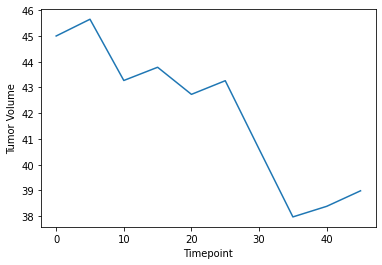

In [38]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
charting_dataframe = capomulin.loc[capomulin['Mouse ID']=="b128",:]
x_axis = charting_dataframe["Timepoint"]
volume_axis = charting_dataframe["Tumor Volume (mm3)"]
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.plot(x_axis,volume_axis)




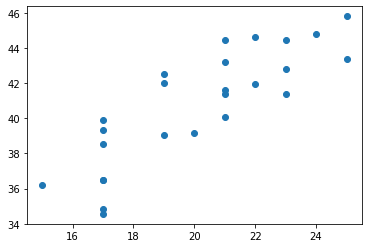

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_avg_tumor_vol = capomulin.groupby(['Mouse ID']).mean()
capomulin_avg_tumor_vol
plt.scatter(capomulin_avg_tumor_vol['Weight (g)'],capomulin_avg_tumor_vol['Tumor Volume (mm3)'])

plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
